# Data Acquisition and Processing

### Extracting Relevant Parameters from IMU Data

IMU data typically includes acceleration, angular velocity, and sometimes GPS data. From this data, we can extract:

- **Vehicle Speed (v(t))**: Integrate acceleration data to obtain speed profiles.
- **Braking Events**: Identify periods where deceleration exceeds a threshold.
- **Deceleration (a(t))**: Directly from acceleration data during braking events.
- **Time Stamps**: For correlating data points and calculating durations.

### Processing Steps

### Data Cleaning:

- Remove noise using filters (e.g., low-pass filters).
- Correct for any sensor biases or drifts.

### Event Identification:

- Define a deceleration threshold to identify braking events.
- Extract start and end times of each braking event.

### Calculating Braking Parameters:

- **Initial and Final Speeds (v_i, v_f)**: At the start and end of braking.
- **Braking Duration (Δt)**: Time difference between start and end of braking.
- **Distance Covered (Δx)**: Integrate speed over time during braking.
- **Average Deceleration (a_avg)**: Calculated from speed and time data.

For each braking event:

$$
a_{\text{avg}} = \frac{v_f - v_i}{\Delta t}
$$

$$
\text{Braking Energy (per wheel)} = \frac{1}{2} \cdot \text{Brake Bias} \cdot m_{\text{vehicle}} \cdot (v_i^2 - v_f^2)
$$


# Geometry Modeling

### A. Defining the Brake Disc Geometry

**Slotted Geometry Features:**

- Slots increase the surface area and affect airflow.
- They can enhance cooling but complicate the geometry.

**Parameters to Define:**

- **Outer and Inner Radii (R_o, R_i):**
    - Determine the disc's annular shape.
- **Thickness (t):**
    - Affects thermal mass and conduction paths.
- **Number and Dimensions of Slots:**
    - Affect surface area and convective heat transfer.

### B. Calculating Geometric Properties

**Surface Areas:**

- **Total Surface Area (A_total):**
    - Includes faces, edges, and slot surfaces.
- **Effective Convective Area:**
    - Adjusted for areas blocked or enhanced by slots.

**Volume (V_disc):**

- Calculated based on the annular volume minus the volume removed by slots.

**Mass (m_disc):**

$${m_\text{disc}} = \rho_{\text{material}} \times V_{\text{disc}}$$


### C. Computational Modeling

**Discretization:**

- If necessary, discretize the disc into finite elements for detailed simulations.

**Simplifications:**

- For lumped parameter models, average properties can be used.


# Thermal Modeling

### A. Heat Generation During Braking

**Frictional Heating:**

Heat Generated ($Q_{\text{gen}}$):

$$
Q_{\text{gen}} = \mu \times F_{\text{normal}} \times v_{\text{disc}} \times \Delta t
$$

Where:

- $\mu$: Coefficient of friction.
- $F_{\text{normal}}$: Normal force on the brake pads.
- $v_{\text{disc}}$: Disc velocity at the friction surface.

**Energy Partition:**

Not all generated heat goes into the disc; some is absorbed by pads.

Heat Partition Coefficient ($\eta$):

- Represents the fraction of heat entering the disc.
- Typically determined experimentally or estimated. (estimated .98)

### B. Heat Dissipation During Cooling

**Convection:**

Newton's Law of Cooling:

$$
Q_{\text{conv}} = h \times A_{\text{conv}} \times (T_{\text{disc}} - T_{\text{air}})
$$

Where:

- $h$: Convective heat transfer coefficient.
- $A_{\text{conv}}$: Convective surface area.

**Radiation:**

Stefan-Boltzmann Law:

$$
Q_{\text{rad}} = \epsilon \times \sigma \times A_{\text{rad}} \times (T_{\text{disc}}^4 - T_{\text{surroundings}}^4)
$$

Where:

- $\epsilon$: Emissivity of the disc material.
- $\sigma$: Stefan-Boltzmann constant.

**Conduction:**

- Heat conducted to other components (e.g., hub).
- May be neglected or included based on importance.

### C. Governing Equation

The temperature change of the disc can be modeled using the energy balance:

$$
m_{\text{disc}} \times C_p \times \frac{dT}{dt} = Q_{\text{gen}} - Q_{\text{conv}} - Q_{\text{rad}}
$$

Where:

- $C_p$: Specific heat capacity of the disc material.
- $\frac{dT}{dt}$: Rate of temperature change.


# Incorporating Geometry into the Thermal Model

### A. Effect of Slotted Geometry

**Increased Surface Area:**

- Slots increase the surface area, enhancing convection and radiation.
- Adjust $ A_{\text{conv}} $ and $ A_{\text{rad}} $ accordingly.

**Airflow Enhancement:**

- Slots can act as air channels, increasing the convective heat transfer coefficient ($ h $).
- May require empirical correlations or CFD analysis to estimate $ h $.

**Thermal Mass Reduction:**

- Material removed by slots reduces the disc's thermal mass.
- Adjust $ m_{\text{disc}} $ and $ V_{\text{disc}} $.

### B. Calculating Convective Heat Transfer Coefficient ($ h $)

**Empirical Correlations:**

Use correlations for rotating discs with slots.

Example:

$$
h = C \times \left( \frac{\rho_{\text{air}} \times v_{\text{disc}} \times L}{\mu_{\text{air}}} \right)^n
$$

Where:

- $ C, n $: Empirical constants.
- $ L $: Characteristic length (e.g., slot width).

**Experimental Data:**

- If available, use experimental data to determine $ h $ for the specific geometry.

**Computational Fluid Dynamics (CFD):**

- Perform CFD simulations to obtain detailed $ h $ distributions.
- More accurate but computationally intensive.


# 5. Simulation Steps

### A. Pre-Processing

**Process IMU Data:**

- Extract time-series data of braking events.
- Calculate initial and final speeds, decelerations, durations for each event.

**Geometry Parameters:**

- Calculate $A_{\text{conv}}$, $A_{\text{rad}}$, $m_{\text{disc}}$, $V_{\text{disc}}$ based on slotted geometry.

**Material Properties:**

- Obtain or interpolate $C_p$, $\rho$, $\epsilon$ as functions of temperature.

### B. Time-Stepping Simulation

For each time step $t_i$:

**Determine Phase:**

- **Braking Phase:** When braking is active.
- **Coasting/Cooling Phase:** When not braking.

**Compute Heat Generation ($Q_{\text{gen}}$):**

- Only during braking phases.
- Use braking data to calculate $Q_{\text{gen}}$.

**Compute Heat Dissipation ($Q_{\text{conv}}$, $Q_{\text{rad}}$):**

- During all phases.
- Update $h$ and $T_{\text{disc}}$ as necessary.

**Update Disc Temperature ($T_{\text{disc}}$):**

- Use the energy balance equation to solve for $\dfrac{dT}{dt}$.
- Update $T_{\text{disc}}$ for the next time step.

**Update Material Properties:**

- If properties are temperature-dependent, update $C_p$, $\rho$, etc.

**Repeat for All Time Steps:**

- Continue the simulation over the entire duration of the race or the data set.

### C. Numerical Methods

- Use appropriate numerical integration methods (e.g., Euler, Runge-Kutta) to solve the differential equations.


In [8]:
# Dummy Braking Data Generator

import numpy as np
import random

total_time = 600  # Total simulation time in seconds
delta_t = 0.1     # Time step in seconds
time = np.arange(0, total_time, delta_t)
mass_vehicle = 290.25  # Vehicle mass in kg
a_brake = -5.0         # Braking acceleration in m/s²
a_accel = 10.0          # Acceleration in m/s²
v_max = 300            # Maximum vehicle speed in m/s

number_of_braking_events = 100
braking_events = []

for _ in range(number_of_braking_events):
    start_time = random.uniform(0, total_time - 10)  # Ensure braking doesn't start near the simulation's end
    duration = random.uniform(3, 10)                # Braking duration between 3 and 10 seconds
    end_time = start_time + duration
    braking_events.append((start_time, end_time))

braking_events.sort()

v_vehicle = np.zeros_like(time)  # Vehicle speed (m/s)
F_brake = np.zeros_like(time)    # Braking force (N)
v_wheel = np.zeros_like(time)    # Wheel speed (rad/s)
a_vehicle = np.zeros_like(time)  # Vehicle acceleration (m/s²)

wheel_radius = 0.3  # Wheel radius in meters
v_vehicle[0] = 300  # Set initial vehicle speed

for i in range(1, len(time)):
    t = time[i]
    dt = delta_t
    v_prev = v_vehicle[i - 1]
    
    # Check if braking occurs at time t
    braking = any(start <= t <= end for start, end in braking_events)
    
    if braking:
        # Braking phase
        a_current = a_brake  # Negative acceleration (deceleration)
        F_total_brake = mass_vehicle * abs(a_current)  # Total braking force
        F_brake[i] = F_total_brake / 4                 # Assuming braking force is equally distributed to four wheels
    else:
        # Acceleration phase or maintaining speed
        a_current = a_accel  # Positive acceleration
        F_brake[i] = 0.0     # No braking force applied
    
    # Update vehicle speed
    v_new = v_prev + a_current * dt
    v_vehicle[i] = max(min(v_new, v_max), 0)  # Ensure speed stays within 0 and v_max

    # Update wheel speed
    v_wheel[i] = v_vehicle[i] / wheel_radius

    # Update vehicle acceleration
    a_vehicle[i] = a_current

braking_data = {
    'time': time,
    'v_vehicle': v_vehicle,
    'v_wheel': v_wheel,
    'F_brake': F_brake,
    'a_vehicle': a_vehicle,
    'braking_events': braking_events
}

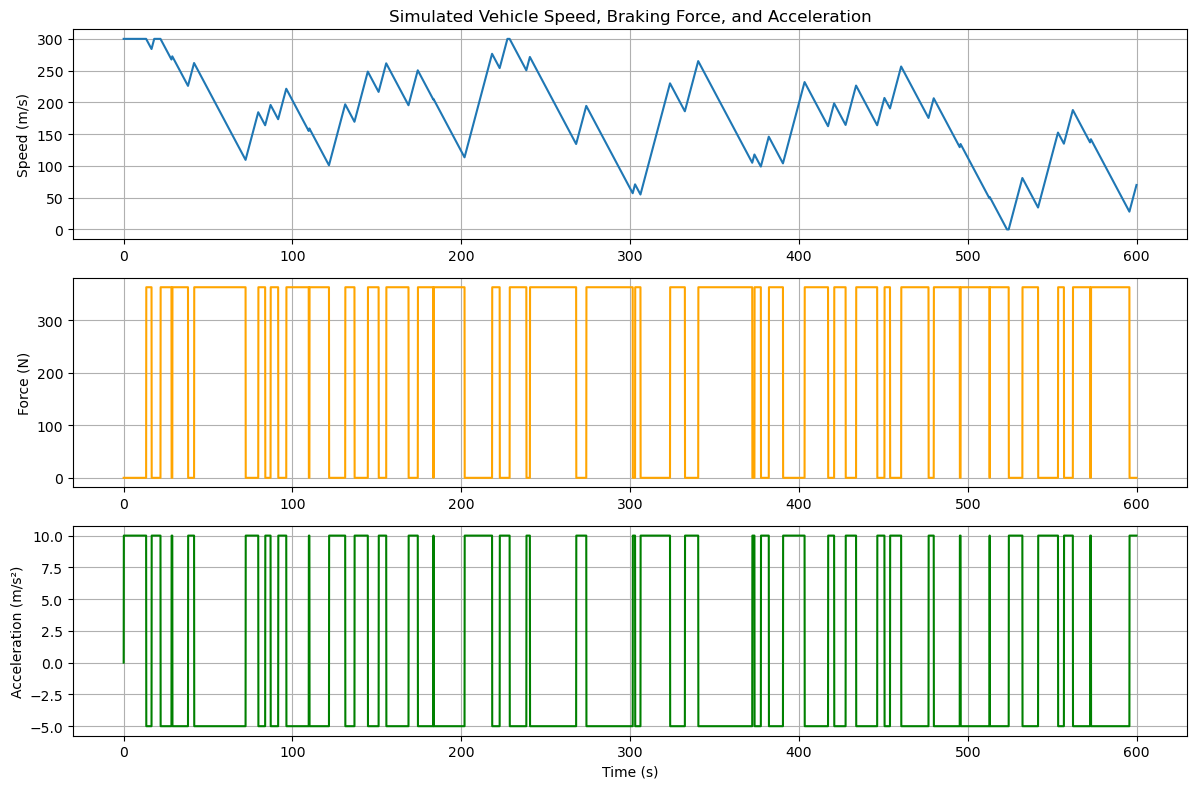

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Vehicle speed plot
plt.subplot(3, 1, 1)
plt.plot(time, v_vehicle, label='Vehicle Speed')
plt.ylabel('Speed (m/s)')
plt.title('Simulated Vehicle Speed, Braking Force, and Acceleration')
plt.grid(True)

# Braking force plot
plt.subplot(3, 1, 2)
plt.plot(time, F_brake, label='Braking Force', color='orange')
plt.ylabel('Force (N)')
plt.grid(True)

# Acceleration plot
plt.subplot(3, 1, 3)
plt.plot(time, a_vehicle, label='Acceleration', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
braking_events

[(13.372362974160643, 16.554397776656273),
 (21.858513528403083, 28.35362350661409),
 (28.815707422336892, 34.1808457868298),
 (32.49721069239249, 38.11673222533321),
 (41.75178808160403, 47.30250869400351),
 (45.9306991499706, 55.341370995440634),
 (53.83961163065693, 58.69598114751495),
 (55.937990778319616, 62.724292721925906),
 (62.601444617977755, 72.20819884123458),
 (62.70712813833911, 68.44493601097805),
 (79.70285049899076, 83.80215401689064),
 (87.00823694988368, 91.5927256178055),
 (96.31696007946536, 105.43556910704356),
 (103.02941178179016, 109.6470957529233),
 (110.02090915319094, 115.07578887698507),
 (110.68579861631045, 118.0603722874043),
 (116.36317906452604, 121.63848269972385),
 (131.27520963996406, 136.7375096958944),
 (144.61732069353786, 151.0561866396053),
 (155.58623642091, 162.45996924443764),
 (159.15617790871053, 168.73909716004064),
 (174.20140484078004, 183.1021221776401),
 (180.26662232889115, 183.42230697636617),
 (183.58548249063296, 189.1404065287623

In [11]:
def calculate_heat_generation(t, braking_data):
    """
    Calculates the heat generated during braking at time t.

    Parameters:
    t (float): The time at which the heat generation is calculated.
    braking_data (dict): A dictionary containing braking variables such as:
        - F_brake (float): Braking force at time t.
        - v_wheel (float): Wheel speed at time t.
        - η (float): Heat partition coefficient.

    Returns:
    float: The amount of heat generated during braking at time t.
    """
    ROTOR_M = 1.0      # Mass of the rotor [kg]
    Cp = 460.0         # Specific heat of the rotor [J/kg/K]
    d_Temp = braking_data.get('v_wheel', 0.0)  # Wheel speed [m/s]
    ETA = .98           # Heat partition coefficient 

    # TODO Q = mCpΔT instead of Power, --> deltaT with infrared sensor
    # TODO Breaking Data Problem: F_brake -----> pressure transducer backsolve for F_brake, velocity from IMU?
    
    # Calculate the heat generated entering the disc
    Q_gen = ETA * ROTOR_M * Cp * d_Temp        # Heat generated [W]

    return Q_gen

In [12]:
"""
Implement in the future. Estimate for now. Backsolve for h using the heat generated and the temperature difference between the disc and the air.
Returns:
float: The convective heat transfer coefficient in W/(m^2*K).
"""
def calculate_convective_coefficient(t_disc, geometry_params):
    return 

In [13]:
def is_braking(t, braking_events):
    """
    Determines whether the vehicle is braking at a given time.

    Args:
        t (float): The time at which to check for braking.
        braking_events (list of dict): A list of braking events, where each event is a dictionary
                                    with 'start_time' and 'end_time' keys representing the 
                                    start and end times of the braking event.

    Returns:
        bool: True if the vehicle is braking at time t, False otherwise.
    """
    for event in braking_events:
        if event['start_time'] <= t <= event['end_time']:
            return True
    return False

In [14]:
import numpy as np

# Pseudocode for the main simulation loop
T_INITIAL = 300  # Initial temperature of the brake disc in K 
epsilon = 0.6  # Emissivity of the brake disc (changes with temperature TODO measure?)
total_time = 100  # Total simulation time in seconds TODO
time_step = 0.1  # Time step for the simulation in seconds TODO
braking_events = [{'start_time': 10, 'end_time': 20}, {'start_time': 40, 'end_time': 50}] # List of braking events
braking_data = {'F_brake': 5000, 'v_wheel': 10, 'η': 0.8} # Braking data
geometry_params = {'diameter': 0.3, 'thickness': 0.02, 'fin_number': 12, 'fin_height': 0.01, 'fin_thickness': 0.001} # Geometry parameters of the brake disc
A_conv = 2 * np.pi * geometry_params['diameter'] * geometry_params['thickness'] 
T_air = 25  # Ambient temperature in degrees Celsius
SIGMA = 5.67e-8  # Stefan-Boltzmann constant in W/(m^2*K^4)
A_rad = np.pi * geometry_params['diameter']**2 
T_surroundings = 25  # Surroundings temperature in degrees Celsius
m_disc = 10  # Mass of the brake disc in kg
Cp = 500  # Specific heat capacity of the brake disc in J/(kg*K)
temperatures = []



# Initialize variables
T_disc = T_INITIAL  # Initial disc temperature
time = np.arange(0, total_time, time_step)

for t in time:
    if is_braking(t, braking_events):
        # Braking phase
        Q_gen = calculate_heat_generation(t, braking_data)
    else:
        # Coasting/Cooling phase
        Q_gen = 0

    # Calculate heat dissipation
    h = .05 # educated guess
    Q_conv = h * A_conv * (T_disc - T_air)
    Q_rad = epsilon * SIGMA * A_rad * (T_disc**4 - T_surroundings**4)

    # Update temperature
    dTdt = (Q_gen - Q_conv - Q_rad) / (m_disc * Cp)
    T_disc += dTdt * time_step

    # Store results
    temperatures.append(T_disc)